In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# pd.set_option('display.max_colwidth', None)

In [3]:
def df_concat(*file_name):
    # concatenates multiple files in a single df
    df_f = pd.DataFrame()
    for i in file_name:
        df_file = pd.read_csv(f'{i}.csv', index_col = 0)
        df_f = pd.concat([df_f, df_file])
    
    # removing duplicated listings
    df_size_with_dups = df_f.shape[0]
    df_f = df_f.drop_duplicates(subset=['url'],keep='first')
    print(f'There is {df_size_with_dups - df_f.shape[0]} duplicates')
    df_f = df_f.reset_index(drop=True)
    return df_f

In [4]:
df = df_concat('apt_house_sfbay_df_2023-03-11')

There is 0 duplicates


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11038 entries, 0 to 11037
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  11038 non-null  int64  
 1   url                    11038 non-null  object 
 2   price                  11038 non-null  int64  
 3   area                   11038 non-null  int64  
 4   location               11038 non-null  object 
 5   latitude               11038 non-null  float64
 6   longitude              11038 non-null  float64
 7   bedrooms               11038 non-null  int64  
 8   bathrooms              11038 non-null  float64
 9   property_type          11038 non-null  float64
 10  parking                11038 non-null  int64  
 11  laundry                11038 non-null  int64  
 12  EV_charging            11038 non-null  int64  
 13  air_conditioning       11038 non-null  int64  
 14  furnished              11038 non-null  int64  
 15  sm

In [6]:
X = df[['area', 'bedrooms', 'bathrooms', 'property_type', 'parking', 'laundry',
            'EV_charging', 'air_conditioning', 'furnished', 'smoking', 'wheelchair_accessible',
            'cats_allowed', 'dogs_allowed', 'zip_code']]
y = df['price']

In [7]:
def report_model_regression(model, X_test, y_test):
    # Predicts y_test. 
    # Calculates MAE, RMSE and the percentage of MAE of the MAE of the average price.
    # Displays scatter plot between predicted and actual price and histogram of the residuals.
    
    model_preds = model.predict(X_test)
    print(f'The mean absolute error is {round(mean_absolute_error(y_test, model_preds), 2)}')
    print(f'The root mean squared error is {round(np.sqrt(mean_squared_error(y_test, model_preds)), 2)}')
    print(f'The percentage of the mean absolute error of the average price is \
{round(mean_absolute_error(y_test, model_preds) / df.price.describe()[1] * 100, 2)}%\n')
    
    plt.scatter(y_test, model_preds)
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
    plt.show()
    
    test_residuals = y_test - model_preds
    sns.displot(test_residuals, bins=25, kde=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = ElasticNet()

In [12]:
param_grid = {'l1_ratio' : [.1, .5, .7, .9, .95, .99, 1]}

In [13]:
grid_model = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

In [14]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [15]:
grid_model.best_params_

{'l1_ratio': 1}

The mean absolute error is 454.31
The root mean squared error is 586.52
The percentage of the mean absolute error of the average price is 15.32%



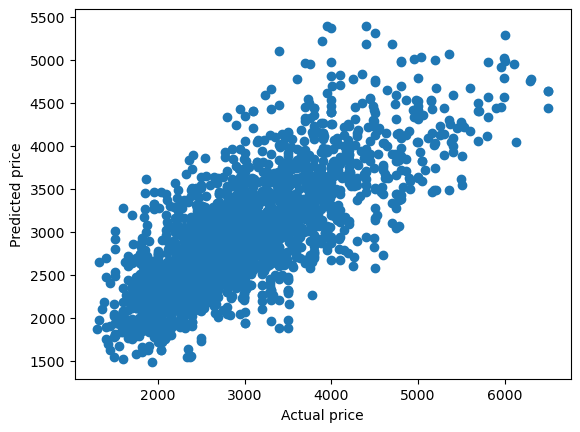

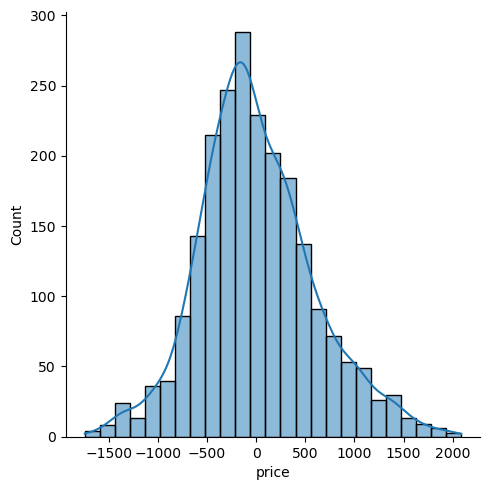

In [16]:
report_model_regression(grid_model, X_test, y_test)

#### Get a quote
Using tkinter to create a GUI for predicting prices of properties.

In [17]:
import tkinter
from tkinter import END, BOTH, LEFT, RIGHT, TOP
from tkinter import IntVar, StringVar, ttk

root = tkinter.Tk()
root.title('Choose Your Apartment')

root.iconbitmap('Double-J-Design-Origami-Colored-Pencil-Blue-home.ico') # filename
root.geometry('900x910+100+100')
root.resizable(0,1)
root.config(bg='gray')

# running the category mapping dictionaries to reverse the values from numerical to categorical
property_type_order = {'in-law': 0, 'cottage/cabin': 1, 'apartment': 2, 'duplex': 3,
                      'condo': 4, 'townhouse': 5, 'house': 6, 'flat': 7}

parking_order = {'no parking': 0, 'off-street parking': 1, 'street parking': 2, 
                 'carport': 3, 'detached garage': 4, 'attached garage': 5, 'valet parking':6}

laundry_order = {'no laundry on site': 0, 'laundry on site': 1, 'laundry in bldg': 2,
                'w/d hookups': 3, 'w/d in unit': 4}


subframe_left = tkinter.Frame(root)
subframe_left.pack(side=LEFT, fill='y')

subframe_right = tkinter.Frame(root)
subframe_right.pack(expand=True, fill=BOTH, side=RIGHT)

padx, pady = 10, 2
ipadx, ipady = 5, 2

label = tkinter.Label(subframe_left, text='Please answer each question', font=('Arial', 18, 'bold'))
label.pack(padx=padx, pady=pady, ipadx=ipadx, ipady=ipady, anchor='w', fill='x')

# property type
frame_property_type = tkinter.LabelFrame(subframe_left, text='What type is the property?', 
                                          font=('Arial', 11, 'bold'))
frame_property_type.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
property_type_list = list(property_type_order.keys())
property_type_combobox = ttk.Combobox(frame_property_type, value=property_type_list, 
                                       font=('Arial', 10,))
property_type_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# zip_code code
frame_zip_code = tkinter.LabelFrame(subframe_left, text='What is the zip_code code of the property?', 
                                          font=('Arial', 11, 'bold'))
frame_zip_code.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
zip_code_list = list(df['zip_code'].unique().astype(int))
zip_code_list.sort()
zip_code_combobox = ttk.Combobox(frame_zip_code, value=zip_code_list, 
                                       font=('Arial', 10,))
zip_code_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# area
frame_area = tkinter.LabelFrame(subframe_left, text='What is the area of the property in square feet?', 
                                          font=('Arial', 11, 'bold'))
frame_area.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
area_entry = ttk.Entry(frame_area, font=('Arial', 10,))
area_entry.grid(row=0, column=0, padx=padx, pady=pady)
area_label = ttk.Label(frame_area, text='sq. ft', font=('Arial', 10,))
area_label.grid(row=0, column=1, padx=0, pady=pady)

# bedrooms
frame_bedrooms = tkinter.LabelFrame(subframe_left, text='How many bedrooms are there in the property?', 
                                          font=('Arial', 11, 'bold'))
frame_bedrooms.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
bedrooms_list = list(df['bedrooms'].unique().astype(int))
bedrooms_list.sort()
bedrooms_combobox = ttk.Combobox(frame_bedrooms, value=bedrooms_list, 
                                       font=('Arial', 10,))
bedrooms_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# bathrooms
frame_bathrooms = tkinter.LabelFrame(subframe_left, text='How many bathrooms are there in the property?', 
                                          font=('Arial', 11, 'bold'))
frame_bathrooms.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
bathrooms_list = list(df['bathrooms'].unique().astype(float))
bathrooms_list.sort()
bathrooms_combobox = ttk.Combobox(frame_bathrooms, value=bathrooms_list, 
                                       font=('Arial', 10,))
bathrooms_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# parking
frame_parking_type = tkinter.LabelFrame(subframe_left, text='What type is the parking?', 
                                          font=('Arial', 11, 'bold'))
frame_parking_type.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
parking_type_list = list(parking_order.keys())
parking_type_combobox = ttk.Combobox(frame_parking_type, value=parking_type_list, 
                                       font=('Arial', 10,))
parking_type_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# laundry
frame_laundry_type = tkinter.LabelFrame(subframe_left, text='What type is the laundry?', 
                                          font=('Arial', 11, 'bold'))
frame_laundry_type.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
laundry_type_list = list(laundry_order.keys())
laundry_type_combobox = ttk.Combobox(frame_laundry_type, value=laundry_type_list, 
                                       font=('Arial', 10,))
laundry_type_combobox.grid(row=0, column=0, padx=padx, pady=pady)

# ac
frame_ac = tkinter.LabelFrame(subframe_left, text='Is there air conditioning in the property?',
                                     font=('Arial', 11, 'bold'))
frame_ac.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_ac = IntVar()
number_ac.set(2)
radio_1 = tkinter.Radiobutton(frame_ac, text='Yes', variable=number_ac, value=1)
radio_2 = tkinter.Radiobutton(frame_ac, text='No', variable=number_ac, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# ev
frame_ev = tkinter.LabelFrame(subframe_left, text='Is there EV charging in the property?',
                                     font=('Arial', 11, 'bold'))
frame_ev.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_ev = IntVar()
number_ev.set(2)
radio_1 = tkinter.Radiobutton(frame_ev, text='Yes', variable=number_ev, value=1)
radio_2 = tkinter.Radiobutton(frame_ev, text='No', variable=number_ev, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# smoking
frame_smoking = tkinter.LabelFrame(subframe_left, text='Is smoking allowed in the property?',
                                     font=('Arial', 11, 'bold'))
frame_smoking.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_smoking = IntVar()
number_smoking.set(2)
radio_1 = tkinter.Radiobutton(frame_smoking, text='Yes', variable=number_smoking, value=1)
radio_2 = tkinter.Radiobutton(frame_smoking, text='No', variable=number_smoking, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# furnished
frame_furnished = tkinter.LabelFrame(subframe_left, text='Is the property funished?', font=('Arial', 11, 'bold'))
frame_furnished.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_furnished = IntVar()
number_furnished.set(2)
radio_1 = tkinter.Radiobutton(frame_furnished, text='Yes', variable=number_furnished, value=1)
radio_2 = tkinter.Radiobutton(frame_furnished, text='No', variable=number_furnished, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# wheelchair
frame_wheelchair = tkinter.LabelFrame(subframe_left, text='Is the property wheelchair accessible?',
                                     font=('Arial', 11, 'bold'))
frame_wheelchair.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_wheelchair = IntVar()
number_wheelchair.set(2)
radio_1 = tkinter.Radiobutton(frame_wheelchair, text='Yes', variable=number_wheelchair, value=1)
radio_2 = tkinter.Radiobutton(frame_wheelchair, text='No', variable=number_wheelchair, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# cats
frame_cats = tkinter.LabelFrame(subframe_left, text='Are cats allowed in the property?',
                                     font=('Arial', 11, 'bold'))
frame_cats.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_cats = IntVar()
number_cats.set(2)
radio_1 = tkinter.Radiobutton(frame_cats, text='Yes', variable=number_cats, value=1)
radio_2 = tkinter.Radiobutton(frame_cats, text='No', variable=number_cats, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)

# dogs
frame_dogs = tkinter.LabelFrame(subframe_left, text='Are dogs allowed in the property?',
                                     font=('Arial', 11, 'bold'))
frame_dogs.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)
number_dogs = IntVar()
number_dogs.set(2)
radio_1 = tkinter.Radiobutton(frame_dogs, text='Yes', variable=number_dogs, value=1)
radio_2 = tkinter.Radiobutton(frame_dogs, text='No', variable=number_dogs, value=0)
radio_1.grid(row=0, column=0, padx=padx, pady=pady)
radio_2.grid(row=0, column=1, padx=padx, pady=pady)



def submit():
    # runs when button 'Done' is pressed
    text = ''
    
    if property_type_combobox.get() in property_type_order.keys():
        property_type = property_type_order[property_type_combobox.get()]
    else:
        text = text + 'Please select a property type.\n'
    
    if zip_code_combobox.get().isdigit() == True:
        if int(zip_code_combobox.get()) in list(df['zip_code'].unique().astype(int)):
            zip_code_code = int(zip_code_combobox.get())
        else:
            text = text + 'Please select a zip_code code from the dropdown list.\n'
    else:
        text = text + 'Please select a zip_code code.\n'
    
    if (area_entry.get().isdigit() == True) & (area_entry.get().isdigit() > 0):
        area = int(area_entry.get())
    else:
        text = text + 'Please enter a valid area size.\n'
    
    if bedrooms_combobox.get().isdigit() == True:
        if int(bedrooms_combobox.get()) in list(df['bedrooms'].unique().astype(int)):
            bedrooms = int(bedrooms_combobox.get())
        else:
            text = text + 'Please select the number of bedrooms from the dropdown list.\n'
    else:
        text = text + 'Please select the number of bedrooms.\n'
    
    
    if (bathrooms_combobox.get().isalpha() == False) and (bathrooms_combobox.get() != ''):
        if float(bathrooms_combobox.get()) in list(df['bathrooms'].unique().astype(float)):
            bathrooms = float(bathrooms_combobox.get())
        else:
            text = text + 'Please select the number of bathrooms from the dropdown list.\n'
    else:
        text = text + 'Please select the number of bathrooms.\n'
    
    if parking_type_combobox.get() in parking_order.keys():
        parking = parking_order[parking_type_combobox.get()]
    else:
        text = text + 'Please select a parking type.\n'
    
    if laundry_type_combobox.get() in laundry_order.keys():
        laundry = laundry_order[laundry_type_combobox.get()]
    else:
        text = text + 'Please select a laundry type.\n'
    
    if number_ac.get() == 2:
        text = text + 'Please select if there is air conditioning in the property.\n'
    else:
        ac = number_ac.get()
    
    if number_ev.get() == 2:
        text = text + 'Please select if there is EV charging in the property.\n'
    else:
        ev = number_ev.get()
    
    if number_smoking.get() == 2:
        text = text + 'Please select if smoking is allowed in the property.\n'
    else:
        smoking = number_smoking.get()
    
    if number_furnished.get() == 2:
        text = text + 'Please select if the property is furnished or not.\n'
    else:
        furnished = number_furnished.get()
    
    if number_wheelchair.get() == 2:
        text = text + 'Please select if the property is wheelchair accessible.\n'
    else:
        wheelchair = number_wheelchair.get()
    
    if number_cats.get() == 2:
        text = text + 'Please select if cats are allowed in the property.\n'
    else:
        cats = number_cats.get()
        
    if number_dogs.get() == 2:
        text = text + 'Please select if dogs are allowed in the property.'
    else:
        dogs = number_dogs.get()
    
    output_field.config(text=text, bg='white', anchor='nw', justify=LEFT, font=('Arial', 11))
                                            
    if text == '':
        X_pred = pd.DataFrame(data=[[area, bedrooms, bathrooms, property_type, parking, laundry,
                              ev, ac, furnished, smoking, wheelchair, cats, dogs, zip_code_code]],
                              columns=X.columns)
        X_pred = scaler.transform(X_pred)
        model_preds = grid_model.predict(X_pred)
        output_field.config(text=f'The estimated monthly rent for the proprty is \
                            \n${round(model_preds[0])}', 
                            bg='white', anchor='nw', justify=LEFT, font=('Arial', 14))
        
        
def clear_output():
    output_field.config(text='')
    
    
# # text field frame
output_field = tkinter.Label(subframe_right, bg='white')
output_field.pack(fill=BOTH, expand=True, padx=padx, pady=10)


# button frame
frame_buttons = tkinter.LabelFrame(subframe_left)
frame_buttons.pack(anchor='w',  fill='x', padx=padx, pady=pady, ipadx=ipadx, ipady=ipady)  
    
button_done = tkinter.Button(frame_buttons, text='Submit', borderwidth=5, width=12,
                             font=('Arial', 11, 'bold'), command=submit)
button_done.grid(row=0, column=0, padx=5, pady=2)

button_clear = tkinter.Button(frame_buttons, text='Clear Output', borderwidth=5, width=12,
                             font=('Arial', 11, 'bold'), command=clear_output)
button_clear.grid(row=0, column=1, padx=5, pady=2)

quit_button = tkinter.Button(frame_buttons, text='Quit', borderwidth=5, width=12,
                             font=('Arial', 11, 'bold'), command=root.destroy)
quit_button.grid(row=0, column=2, padx=5, pady=2)


root.mainloop()